In [1]:
import pandas as pd
import numpy as np

# Reading the data

In [2]:
data=pd.read_csv('Ecommerce_Customers.csv')

In [3]:
data.head(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
data1=data.drop(columns=['Email','Address','Avatar'])

In [6]:
data1.head(5)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
data1.columns

Index(['Avg Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
X=data1.drop(columns=['Yearly Amount Spent'])

In [9]:
X.head(5)

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [10]:
Y=data1['Yearly Amount Spent']

In [11]:
Y.head(5)

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

# Plotting the data

In [12]:
import seaborn as sns

In [13]:
sns.set(style="ticks")

Comparison between Average Session Length and Yearly Amount Spent

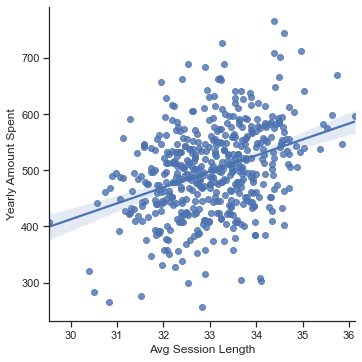

In [14]:
sns.lmplot(x="Avg Session Length", y="Yearly Amount Spent", data=data1)

Comparison between Time on App and Yearly Amount Spent

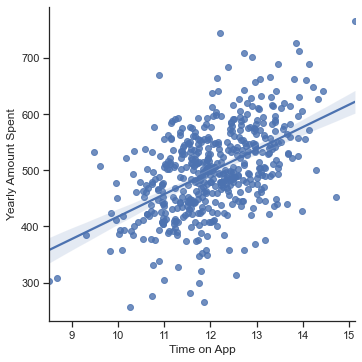

In [15]:
sns.lmplot(x="Time on App", y="Yearly Amount Spent", data=data1)

Comparison between Time on website and yearly amount spent

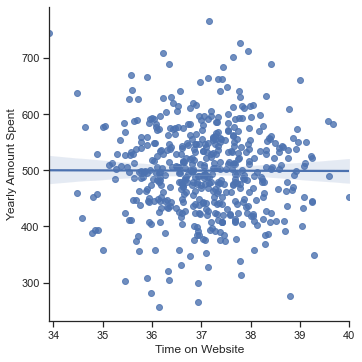

In [16]:
sns.lmplot(x="Time on Website", y="Yearly Amount Spent", data=data1)

Comparison between Length of membership and yearly amount spent

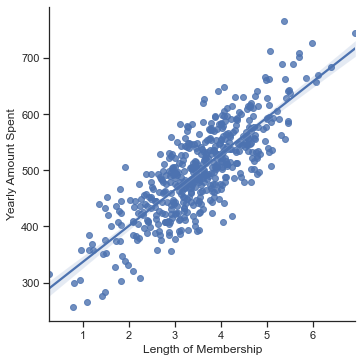

In [17]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=data1)

Applying Linear regression on data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=1)

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
reg = linear_model.LinearRegression()

In [21]:
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Coefficients: ', reg.coef_)
print('Intercept:',reg.intercept_)

Coefficients:  [2.60891361e+01 3.90264696e+01 6.33046136e-03 6.12929297e+01]
Intercept: -1049.784727508769


In [23]:
y_pred=reg.predict(X_test)

To calculate error

In [24]:
rmse=mean_squared_error(y_test,y_pred)

In [25]:
print("The Mean squared error is",rmse)

The Mean squared error is 89.58380731155455


In [26]:
r2=r2_score(y_test,y_pred)
print("r2 score is",r2)

r2 score is 0.987032307056989


Here the r2 score is near to 1 which means that the data is highly correlated to each other

Text(0, 0.5, 'Predicted value')

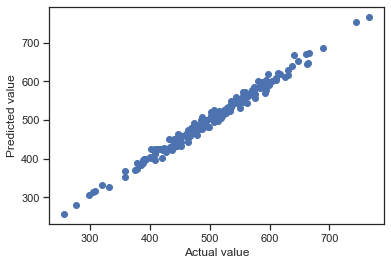

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')